#Feature preparation

## 1 - Feature extraction

In [1]:
import pandas as pd

train_data = pd.read_csv('labeledTrainData.tsv', sep='\t')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use seaborn for plotting defaults
import seaborn as sns; sns.set()

### Review length

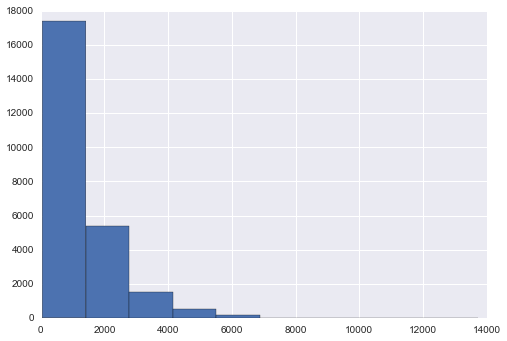

In [3]:
train_data['review_length'] = train_data.review.apply(len)

p = plt.hist(train_data.review_length.values)

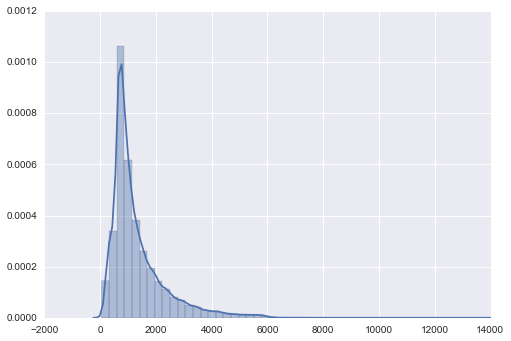

In [4]:
p = sns.distplot(train_data.review_length.values)

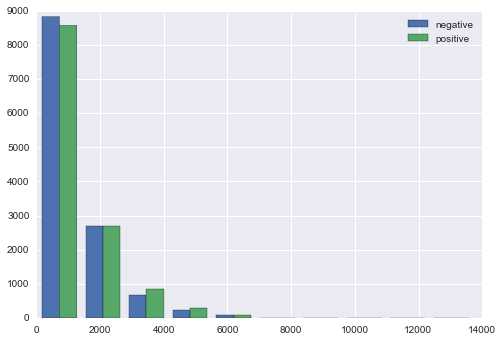

In [5]:
p = plt.hist([train_data[train_data.sentiment==0].review_length.values, 
              train_data[train_data.sentiment==1].review_length.values], label=['negative', 'positive'])
plt.legend()

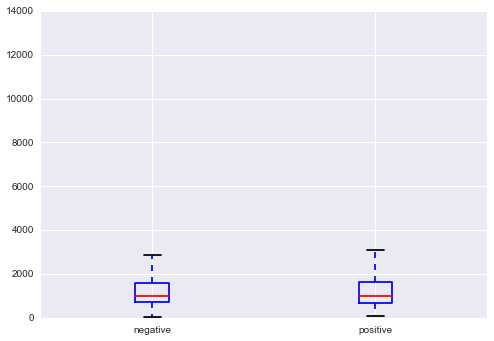

In [6]:
bp = plt.boxplot([train_data[train_data.sentiment==0].review_length.values, 
              train_data[train_data.sentiment==1].review_length.values], labels=['negative', 'positive'])


In [7]:
# Negative reviews
train_data[train_data.sentiment==0].describe()

,sentiment,review_length
count,12500,12500.000000
mean,0,1305.942240
std,0,959.400711
min,0,52.000000
25%,0,711.000000
50%,0,978.500000
75%,0,1570.000000
max,0,8999.000000


In [8]:
# Positive reviews
train_data[train_data.sentiment==1].describe()

,sentiment,review_length
count,12500,12500.000000
mean,1,1349.965440
std,0,1049.249815
min,1,70.000000
25%,1,695.000000
50%,1,984.000000
75%,1,1654.000000
max,1,13708.000000


In [9]:
train_data[train_data.review_length==52].review.all()

'This movie is terrible but it has some good effects.'

In [10]:
train_data[train_data.review_length==13708].review.all()

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

### Word extractions

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vocab = ['awesome', 'terrible']

In [13]:
# Expand the dictionary
#vocab=['awesome', 'good', 'nice', 'amazing', 'wonderful', 'like', 'interesting', 'terrible', 'hate', 'boring', 'awful']

In [14]:
simple_vectorizer = CountVectorizer(vocabulary=vocab)
bow = simple_vectorizer.fit_transform(train_data.review).todense()

In [15]:
bow

matrix([[0, 0],
        [0, 0],
        [0, 0],
        ..., 
        [0, 0],
        [0, 0],
        [0, 0]])

In [16]:
words = list(simple_vectorizer.vocabulary_.keys())

In [17]:
words

['awesome', 'terrible']

In [18]:
# Convert bow to DataFrame
bow_df = pd.DataFrame(bow, index=train_data.index, columns = words)

In [19]:
# How many have neither word?
bow_df[(bow_df.awesome==0) & (bow_df.terrible==0)].count()

awesome     23276
terrible    23276
dtype: int64

In [20]:
# Join with training data
df = train_data.join(bow_df)

In [21]:
df[(df.sentiment==1) & (df.terrible>0)].count()

id               217
sentiment        217
review           217
review_length    217
awesome          217
terrible         217
dtype: int64

In [22]:
df[(df.sentiment==0) & (df.awesome>0)].count()

id               111
sentiment        111
review           111
review_length    111
awesome          111
terrible         111
dtype: int64

In [23]:
# Expand vocabulary
vocab_expand = ['awesome', 'good', 'amazing', 'interesting', 'terrible', 'bad', 'awful','boring']

In [24]:
expand_vectorizer = CountVectorizer(vocabulary=vocab_expand)
bow_expand = expand_vectorizer.fit_transform(train_data.review).todense()

In [25]:
bow_expand

matrix([[0, 0, 0, ..., 3, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [26]:
words_expand = list(expand_vectorizer.vocabulary_.keys())

In [27]:
# Convert bow to DataFrame
bow_expand_df = pd.DataFrame(bow_expand, index=train_data.index, columns = words_expand)

In [28]:
s = bow_expand_df.apply(sum, axis=1)

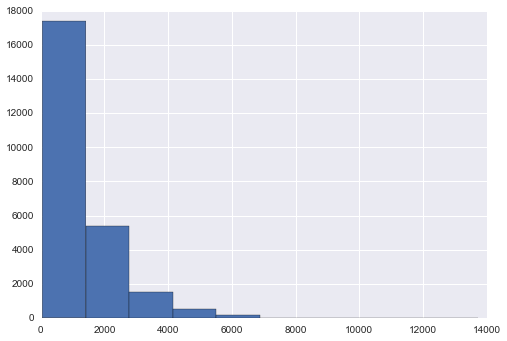

In [29]:
p = plt.hist(train_data.review_length.values)

In [30]:
s.value_counts()

0     9420
1     6921
2     4015
3     2174
4     1131
5      600
6      325
7      159
8       91
9       59
10      42
11      20
12      13
14       8
13       7
16       6
15       5
22       1
19       1
18       1
17       1
dtype: int64

In [31]:
train_data_expand = train_data.join(bow_expand_df)

In [32]:
# Store file
train_data_expand.to_csv('trainDataFeatures2.tsv', sep='\t')